# Machine Learning with Python - Logistic Regression
The basics of classification with linear models

### gradient descent and sklearn 
The most popular framework for fiting popular small data models

In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#read in our titanic data
df_og = pd.read_csv('data/train.csv') 

In [14]:
#split the data set into train and test sets remove any non-numeric columns for the example
X, y = df_og.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Survived']), df_og['Survived']
X = X.replace({'male': 0, 'female': 1}).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('size of X_train') 
print(X_train.shape)
print('size of X_test')
print(X_test.shape)
print('size of y_train') 
print(y_train.shape)
print('size of y_test')
print(y_test.shape)

size of X_train
(596, 6)
size of X_test
(295, 6)
size of y_train
(596,)
size of y_test
(295,)


In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


Let's implement logistic regression from scratch. We will use a modified example from [this blog post.](https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082)

In [ ]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """    
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

def beta_init(X):
    """ Generate an initial value of vector of betas from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of beta filled with initial guess
    """
    beta = np.random.randn((X.shape[1])+1, 1)
    return beta

def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))

def Logistics_Regression(X, y, learningrate, iterations):
    """ Find the Logistics regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final beta vector and the plot of cost function
    """
    y_new = y.values.reshape((len(y), 1))   
    cost_lst = []
    vectorX = generateXvector(X)
    beta = beta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(beta)) - y_new)
        beta = beta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(beta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
     #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return beta

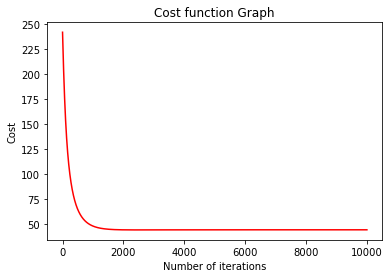

In [18]:
beta = Logistics_Regression(X_train, y_train, 0.01, 10000)

In [20]:
beta

array([[-0.6808811 ],
       [-0.65808744],
       [ 1.24922341],
       [-0.1844225 ],
       [-0.32396103],
       [-0.08815265],
       [ 0.2043374 ]])

Much easier, let's just use the sklearn implementation.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
classifier = LogisticRegression(random_state = 0, penalty = 'none')
classifier.fit(X_train, y_train)
classifier.intercept_, classifier.coef_

(array([-0.68088451]),
 array([[-0.6580703 ,  1.24922165, -0.18441534, -0.32395783, -0.08816187,
          0.20435519]]))

In [23]:
y_pred = classifier.predict(X_train)

accuracy_score(y_train, y_pred)

0.7969798657718121

In [24]:
#for test set
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8

In [25]:
confusion_matrix(y_test, y_pred)

array([[153,  22],
       [ 37,  83]])